# Training Random Forest Classifier for Lecturer-Course Matching
This notebook implements a Random Forest Classifier to predict the most suitable lecturer based on course details.

In [10]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Load the cleaned data
df = pd.read_csv('cleaned_data.csv')
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (24, 13)


,program,hourly_pay,level,time_pref,student_count,subject,credits,institute_rating,lecturer_id,duration,division,status,language
0,1,0.639148,0,1,1.778024,19,0.868132,1.668115,0,1.331086,3,0,0
1,1,0.639148,0,1,1.778024,6,-0.228456,1.668115,0,1.331086,3,0,0
2,2,0.639148,0,1,-0.523418,12,-0.228456,1.668115,3,0.370599,3,0,0
3,2,0.639148,0,1,-0.523418,13,-0.228456,1.668115,0,0.370599,3,0,0
4,7,-0.159787,4,1,-0.523418,2,1.964720,1.668115,0,0.370599,4,0,0


In [29]:
df.columns

Index(['program', 'hourly_pay', 'level', 'time_pref', 'student_count',
       'subject', 'credits', 'institute_rating', 'lecturer_id', 'duration',
       'division', 'status', 'language'],
      dtype='object')

In [19]:
# Prepare features and target
X = df.drop('lecturer_id', axis=1)
y = df['lecturer_id']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (21, 12)
Testing set shape: (3, 12)


In [31]:
X_train.columns

Index(['program', 'hourly_pay', 'level', 'time_pref', 'student_count',
       'subject', 'credits', 'institute_rating', 'duration', 'division',
       'status', 'language'],
      dtype='object')

In [20]:
# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

In [21]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=5)
print("\nCross-validation scores:", cv_scores)
print("Average CV score:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/s


Cross-validation scores: [0.6 0.4 0.  0.4 0.5]
Average CV score: 0.38
Standard deviation: 0.2039607805437114


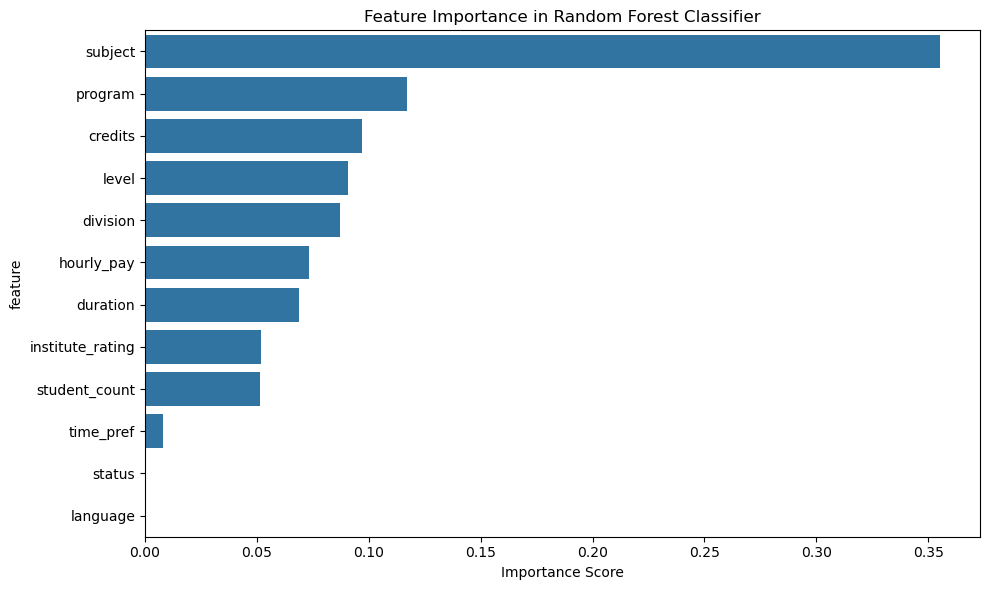

In [46]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_classifier.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Random Forest Classifier')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

In [47]:
# Save the trained model
import joblib
joblib.dump(rf_classifier, 'lecturer_matcher_rf.joblib')
print("Model saved as 'lecturer_matcher_rf.joblib'")

Model saved as 'lecturer_matcher_rf.joblib'


## Example: Making Predictions for New Courses

Here's how to use the model to predict suitable lecturers for new courses:

In [48]:
# Example: Create a sample course
sample_course = pd.DataFrame({
    'program': [0],  # Encoded program name
    'hourly_pay': [1.2],  # Standardized hourly payment
    'level': [0],  # Encoded level
    'time_pref': [1],  # Encoded time preference
    'student_count': [1.18],  # Standardized student count
    'subject': [9],  # Encoded subject
    'credits': [0.07],  # Standardized credits
    'institute_rating': [1.82],  # Standardized institute rating
    'duration': [0.02],
    'division': [0],
    'status': [0],
    'language': [0]
})

# Make prediction
predicted_lecturer = rf_classifier.predict(sample_course)
print("Predicted lecturer ID:", predicted_lecturer[0])

# Get prediction probabilities for all lecturers
prediction_probs = rf_classifier.predict_proba(sample_course)
lecturer_probs = pd.DataFrame({
    'lecturer_id': rf_classifier.classes_,
    'probability': prediction_probs[0]
}).sort_values('probability', ascending=False)

print("\nTop 3 recommended lecturers:")
print(lecturer_probs.head(3))

Predicted lecturer ID: 0

Top 3 recommended lecturers:
   lecturer_id  probability
0            0         0.56
1            1         0.19
3            3         0.19


In [1]:
from sklearn.linear_model import LogisticRegression

In [7]:
# Initialize and train the Logistic Regression model
# Using 'multinomial' solver since we have multiple classes (lecturers)
log_reg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=5000,
    random_state=42
)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [8]:
# Model Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Perform cross-validation
cv_scores = cross_val_score(log_reg, X, y, cv=5)
print("\nCross-validation scores:", cv_scores)
print("Average CV score:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.00      0.00      0.00         1
           2       1.00      0.67      0.80         3
           3       0.75      1.00      0.86         3
           5       0.50      1.00      0.67         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
          10       0.50      1.00      0.67         1
          11       1.00      1.00      1.00         1

    accuracy                           0.64        14
   macro avg       0.53      0.56      0.50        14
weighted avg       0.73      0.64      0.63        14



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/s


Cross-validation scores: [0.35714286 0.71428571 0.57142857 0.35714286 0.5       ]
Average CV score: 0.5
Standard deviation: 0.13552618543578768


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


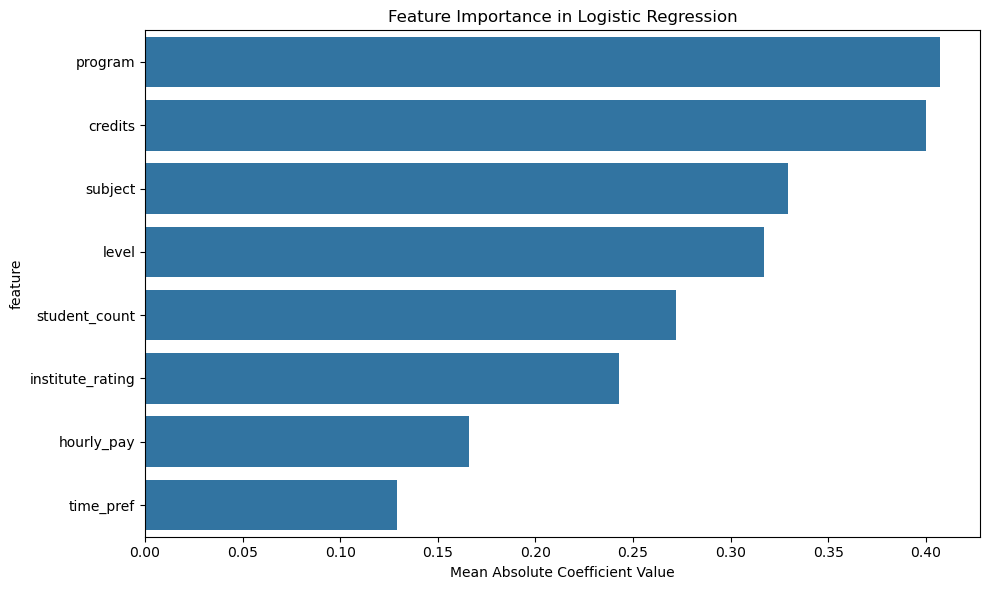

In [9]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.mean(np.abs(log_reg.coef_), axis=0)
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Logistic Regression')
plt.xlabel('Mean Absolute Coefficient Value')
plt.tight_layout()
plt.show()

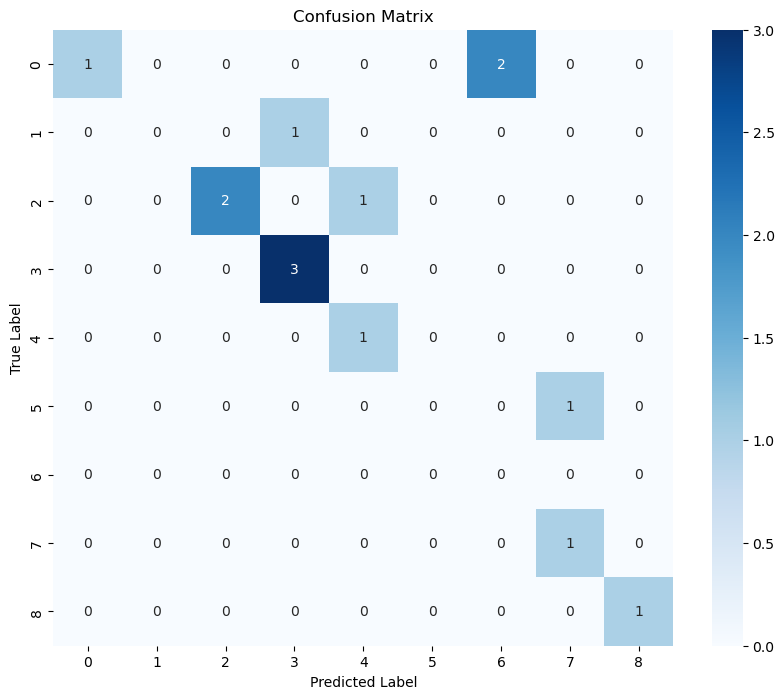

In [10]:
# Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [11]:
# Save the trained model
import joblib
joblib.dump(log_reg, 'lecturer_matcher_logistic.joblib')
print("Model saved as 'lecturer_matcher_logistic.joblib'")

Model saved as 'lecturer_matcher_logistic.joblib'


In [13]:
# Example: Create a sample course
sample_course = pd.DataFrame({
    'program': [0],  # Encoded program name
    'hourly_pay': [1.2],  # Standardized hourly payment
    'level': [0],  # Encoded level
    'time_pref': [1],  # Encoded time preference
    'student_count': [1.18],  # Standardized student count
    'subject': [9],  # Encoded subject
    'credits': [0.07],  # Standardized credits
    'institute_rating': [1.82]  # Standardized institute rating
})

# Make prediction
predicted_lecturer = log_reg.predict(sample_course)
print("Predicted lecturer ID:", predicted_lecturer[0])

# Get prediction probabilities for all lecturers
prediction_probs = log_reg.predict_proba(sample_course)
lecturer_probs = pd.DataFrame({
    'lecturer_id': log_reg.classes_,
    'probability': prediction_probs[0]
}).sort_values('probability', ascending=False)

print("\nTop 3 recommended lecturers:")
print(lecturer_probs.head(3))

Predicted lecturer ID: 0

Top 3 recommended lecturers:
   lecturer_id  probability
0            0     0.598524
1            1     0.200238
3            3     0.108930
